In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from scipy.stats import ttest_ind

In [2]:
dirctl='/dhobyghaut/grandey/data5/cesm/s2s/'
pptcu2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.PRECC.nc')
pptcl2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.PRECL.nc')
# print(pptcu2k)
pptcueas0=xr.open_dataset(dirctl+'p17d_b_eas0b/atm/p17d_b_eas0b.cam.h0.PRECC.nc')
pptcleas0=xr.open_dataset(dirctl+'p17d_b_eas0b/atm/p17d_b_eas0b.cam.h0.PRECL.nc')

# wind=xr.open_dataset(dirctl+'p17d_b_eas0/atm/')
#ppt data is in m/s. convert to mm/day *60*60*24*1000 = *86400000
units=60*60*24*1000
latmin=-8.30
latmax=33.98
lonmin=80.66
lonmax=125.42
starttime=12*40
#comment out this section below if you want global data
pptcl2k=pptcl2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcu2k=pptcu2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcleas0=pptcleas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcueas0=pptcueas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
#comment out section above if you want global data
t,nlat,nlon=np.shape(pptcl2k.PRECL)
lons=pptcl2k.lon
lats=pptcl2k.lat



/home/likkhian/anaconda3/envs/python3env/lib/python3.6/site-packages/xarray/conventions.py:393: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/likkhian/anaconda3/envs/python3env/lib/python3.6/site-packages/xarray/conventions.py:412: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


<xarray.DataArray 'lat' (lat: 22)>
array([ -6.631579,  -4.736842,  -2.842105,  -0.947368,   0.947368,   2.842105,
         4.736842,   6.631579,   8.526316,  10.421053,  12.315789,  14.210526,
        16.105263,  18.      ,  19.894737,  21.789474,  23.684211,  25.578947,
        27.473684,  29.368421,  31.263158,  33.157895])
Coordinates:
  * lat      (lat) float64 -6.632 -4.737 -2.842 -0.9474 0.9474 2.842 4.737 ...
Attributes:
    long_name:  latitude
    units:      degrees_north
<xarray.DataArray 'lon' (lon: 18)>
array([  82.5,   85. ,   87.5,   90. ,   92.5,   95. ,   97.5,  100. ,  102.5,
        105. ,  107.5,  110. ,  112.5,  115. ,  117.5,  120. ,  122.5,  125. ])
Coordinates:
  * lon      (lon) float64 82.5 85.0 87.5 90.0 92.5 95.0 97.5 100.0 102.5 ...
Attributes:
    long_name:  longitude
    units:      degrees_east
480


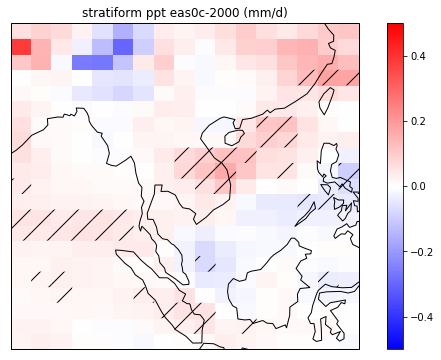

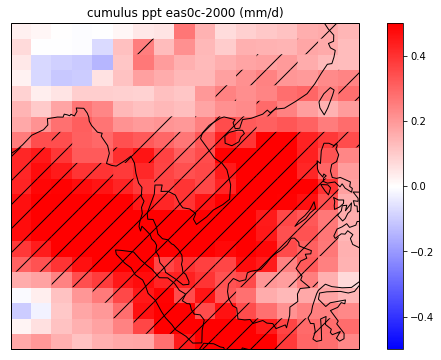

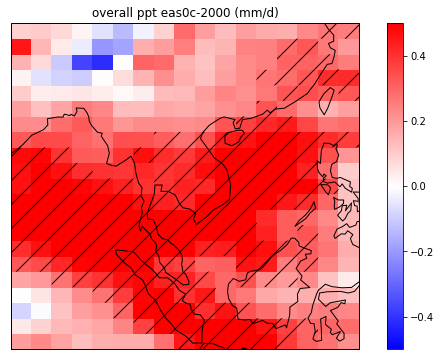

In [3]:
print(pptcu2k.lat)
print(pptcueas0.lon)
print(starttime)


t1,p1 = ttest_ind(pptcleas0.PRECL[starttime:,:,:],pptcl2k.PRECL[starttime:,:,:])
pp1 = np.ma.masked_greater(p1, 0.1)
t2,p2 = ttest_ind(pptcueas0.PRECC[starttime:,:,:],pptcu2k.PRECC[starttime:,:,:])
pp2 = np.ma.masked_greater(p2, 0.1)
t3,p3 = ttest_ind(pptcleas0.PRECL[starttime:,:,:]+pptcueas0.PRECC[starttime:,:,:],pptcl2k.PRECL[starttime:,:,:]+pptcu2k.PRECC[starttime:,:,:])
pp3 = np.ma.masked_greater(p3, 0.1)


plt.rcParams["figure.figsize"] = 10,6 #change inline plot size
plt.figure(1)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(pptcl2k.lon,pptcl2k.lat,np.mean(pptcleas0.PRECL[starttime:,:,:]-pptcl2k.PRECL[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
ax=plt.gca()
ax.set_title('stratiform ppt eas0c-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(pptcu2k.lon, pptcu2k.lat, pp1, hatch='/', alpha=0.)

plt.figure(2)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(pptcu2k.lon,pptcu2k.lat,np.mean(pptcueas0.PRECC[starttime:,:,:]-pptcu2k.PRECC[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
ax=plt.gca()
ax.set_title('cumulus ppt eas0c-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(pptcu2k.lon, pptcu2k.lat, pp2, hatch='/', alpha=0.)


plt.figure(3)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(pptcu2k.lon,pptcu2k.lat,np.mean(pptcleas0.PRECL[starttime:,:,:]+pptcueas0.PRECC[starttime:,:,:]-pptcl2k.PRECL[starttime:,:,:]-pptcu2k.PRECC[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
ax=plt.gca()
ax.set_title('overall ppt eas0c-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(pptcu2k.lon, pptcu2k.lat, pp3, hatch='/', alpha=0.)
# plt.figtext(.02, .02, 'domain mean is {}'.format(np.mean(pptcleas0.PRECL+pptcueas0.PRECC-pptcl2k.PRECL-pptcu2k.PRECC)))
plt.show()

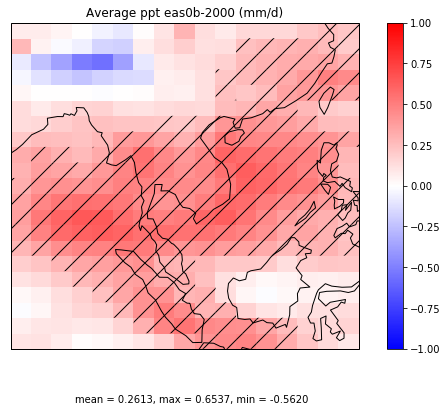

In [4]:
#seasonal outputs. 0=jan ... 11=dec

pptcl2ka=pptcl2k.PRECL.data.reshape((-1,12,nlat,nlon))
pptcl2kb=pptcl2ka[:,:,:,:].reshape((-1,nlat,nlon))
pptcu2ka=pptcu2k.PRECC.data.reshape((-1,12,nlat,nlon))
pptcu2kb=pptcu2ka[:,:,:,:].reshape((-1,nlat,nlon))
pptcleas0a=pptcleas0.PRECL.data.reshape((-1,12,nlat,nlon))
pptcleas0b=pptcleas0a[:,:,:,:].reshape((-1,nlat,nlon))
pptcueas0a=pptcueas0.PRECC.data.reshape((-1,12,nlat,nlon))
pptcueas0b=pptcueas0a[:,:,:,:].reshape((-1,nlat,nlon))

#ignore transient period 3*40yrs
starttime=120

t1,p1 = ttest_ind(pptcleas0b[starttime:,:,:],pptcl2kb[starttime:,:,:])
pp1 = np.ma.masked_greater(p1, 0.1)
t2,p2 = ttest_ind(pptcueas0b[starttime:,:,:],pptcu2kb[starttime:,:,:])
pp2 = np.ma.masked_greater(p2, 0.1)
t3,p3 = ttest_ind(pptcleas0b[starttime:,:,:]+pptcueas0b[starttime:,:,:],pptcl2kb[starttime:,:,:]+pptcu2kb[starttime:,:,:])
pp3 = np.ma.masked_greater(p3, 0.1)

# plt.rcParams["figure.figsize"] = 10,6 #change inline plot size
# plt.figure(1)
# plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolor(lons, lats,np.mean(pptcleas0b[starttime:,:,:]-pptcl2kb[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
# ax=plt.gca()
# ax.set_title('stratiform ppt eas0-2000 (mm/d)')
# ax.coastlines()
# plt.colorbar()
# plt.pcolor(lons, lats, pp1, hatch='/', alpha=0.)

# plt.figure(2)
# plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolor(lons, lats,np.mean(pptcueas0b[starttime:,:,:]-pptcu2kb[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
# ax=plt.gca()
# ax.set_title('cumulus ppt eas0-2000 (mm/d)')
# ax.coastlines()
# plt.colorbar()
# plt.pcolor(lons, lats, pp2, hatch='/', alpha=0.)

netdiff=pptcleas0b[starttime:,:,:]+pptcueas0b[starttime:,:,:]-pptcl2kb[starttime:,:,:]-pptcu2kb[starttime:,:,:]
plt.figure(3)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(lons, lats,np.mean(netdiff,axis=0)*units,cmap='bwr',vmax=1,vmin=-1)
ax=plt.gca()
ax.set_title('Average ppt eas0b-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(lons, lats, pp3, hatch='/', alpha=0.)
plt.figtext(0.35,0,'mean = {:.4f}, max = {:.4f}, min = {:.4f}'.format(units*np.mean(netdiff),\
                                                     units*np.max(np.mean(netdiff,axis=0)),\
                                                     units*np.min(np.mean(netdiff,axis=0))))
plt.show()

# Comparison with wrf downscalling

(11, 22, 18)


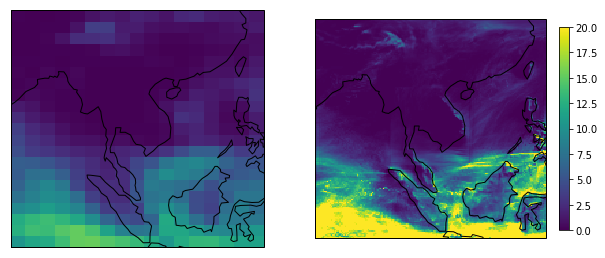

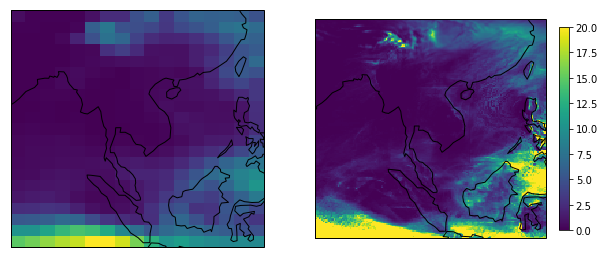

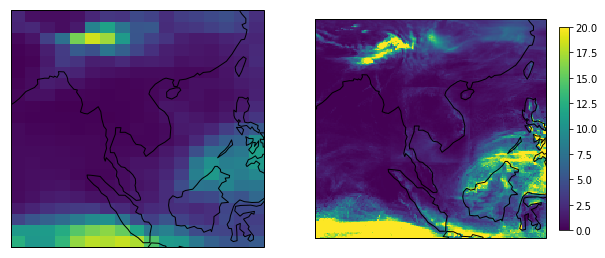

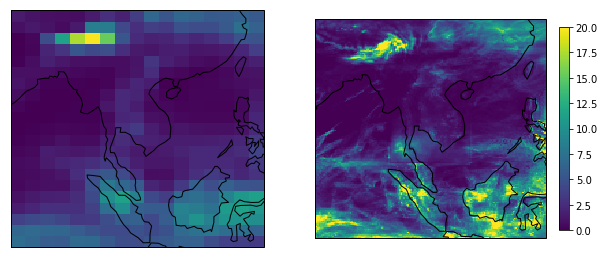

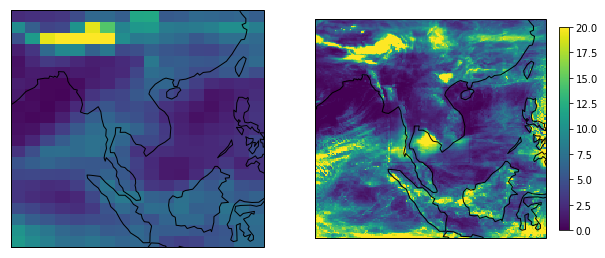

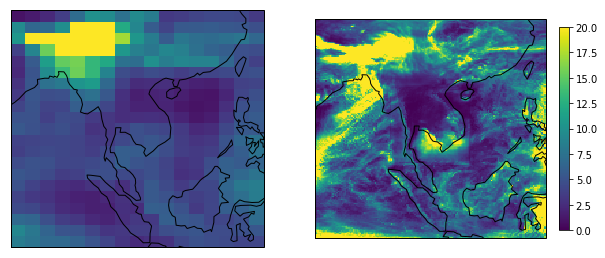

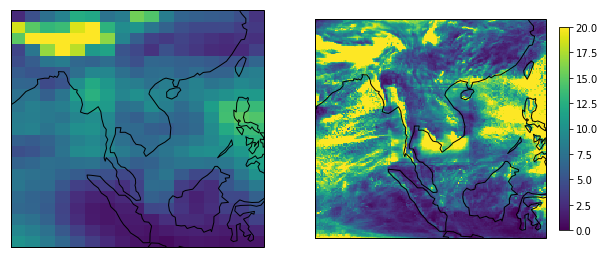

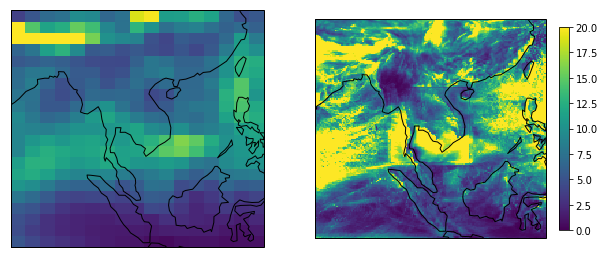

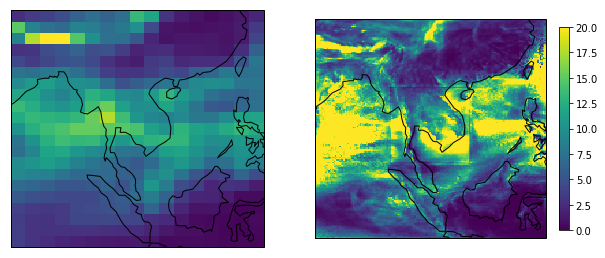

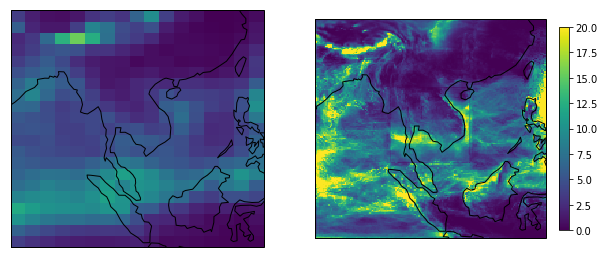

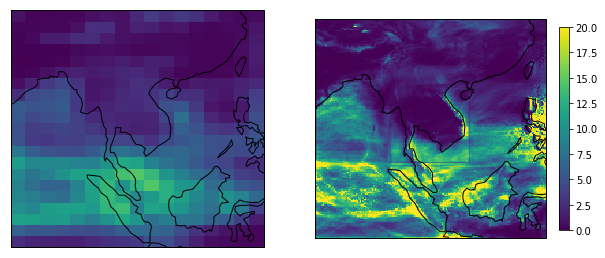

In [46]:
import matplotlib
wrfout=xr.open_dataset('./wrfpost_run_0042_d01.nc')
wrfppt=wrfout.PPT.resample('1M',dim='time',how='mean')
cesmppt=pptcu2k.PRECC[41*12:42*12-1]+pptcl2k.PRECL[41*12:42*12-1]
print(np.shape(cesmppt))
for tt in range(0,11):
    plt.figure(tt)
    ax1=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
    ax1.pcolor(lons, lats,cesmppt[tt,:,:]*units,vmin=0,vmax=20)
    ax1.coastlines()
    ax2=plt.subplot(1,2,2,projection=ccrs.PlateCarree())
    ax2.pcolor(wrfout.lon,wrfout.lat,wrfppt[tt,:,:],vmin=0,vmax=20)
    ax2.coastlines()
    cmap = plt.get_cmap('viridis')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=20))
    sm._A = []
    plt.colorbar(sm,ax=ax2,fraction=0.04, pad=0.05)

plt.show()

In [ ]:
uwind=np.mean(ffbbw.U10[:,::10,::10],axis=0)
vwind=np.mean(ffbbw.V10[:,::10,::10],axis=0)
slon = ffbbw.lon[0::10]
slat = ffbbw.lat[0::10]
windspeed = (uwind**2+vwind**2)**0.5
plt.figure(3)
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.pcolor(ffbbw.lon.data,ffbbw.lat.data,np.mean(ffbbw.PPT,axis=0))
plt.colorbar()
plt.quiver(slon,slat,uwind,vwind,pivot='middle')
plt.show()

In [36]:
np.set_printoptions(threshold=np.inf)
# a = np.asarray([i for i in range(24) for _ in range(0)]).reshape((24, 3, 3))
# print(a)
# aa = a.reshape((-1,3,4,3,3))
# print(aa[:,:,2,:,:].reshape((-1,3,3)))
a=np.asarray([i for i in range(24) for _ in range(9)])
aa=a.reshape((24,3,3))
# print(aa)
aaa=aa.reshape((-1,12,3,3))
print(aaa[:,5:8,:,:].reshape((-1,3,3)))

[[[ 5  5  5]
  [ 5  5  5]
  [ 5  5  5]]

 [[ 6  6  6]
  [ 6  6  6]
  [ 6  6  6]]

 [[ 7  7  7]
  [ 7  7  7]
  [ 7  7  7]]

 [[17 17 17]
  [17 17 17]
  [17 17 17]]

 [[18 18 18]
  [18 18 18]
  [18 18 18]]

 [[19 19 19]
  [19 19 19]
  [19 19 19]]]
